In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline

In [2]:
df=pd.read_csv("UCI_Credit_Card.csv",index_col="ID")
df.rename(columns=lambda x:x.lower(), inplace=True)

#########################################################
# BASE VALUES: FEMALE, OTHER EDUCATION, NOT MARRIED

#SET DUMMY VALUES (ONE HOT ENCODING) FOR EDUCATION
########################################################

df['grad_school'] =(df["education"]==1).astype("int")
df['university']=(df["education"]==2).astype("int")
df['high_school']=(df["education"]==3).astype("int")
df.drop("education", axis=1, inplace=True)

df['male']=(df["sex"]==1).astype("int")
df.drop("sex",axis=1,inplace=True)

df['married']=(df["marriage"]==1).astype("int")
df.drop("marriage",axis=1,inplace=True)

##########################################################
# FOR PAY FEATURES IF <=0 THEN IT MEANNS ITS NOT DELAYED
##########################################################

pay_features=['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
for p in pay_features:
    df.loc[df[p]<=0, p]= 0
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)
df.head()


,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,grad_school,university,high_school,male,married
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
2,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,...,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0
3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0
4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,1
5,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,...,10000.0,9000.0,689.0,679.0,0,0,1,0,1,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [4]:
target_name="default"
X=df.drop('default',axis=1)
robust_scaler=RobustScaler()
X=robust_scaler.fit_transform(X)
y=df[target_name]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=123,stratify=y)


In [5]:
# CONFUSION MATRIX

def CMatrix(CM, labels=['pay','default']):
    df=pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='True'
    df.columns.name='Prediction'
    df.loc['Total']=df.sum()
    df['Total']=df.sum(axis=1)
    return df


In [6]:
metrics= pd.DataFrame(index=['accuracy','precision','recall'],columns=['NULL',"LOGREG","CLASSTREE","NAIVEBAYES"])


#######################################  FOR NULL  ###############################
# MODEL EVALUATION #

y_pred_test=np.repeat(y_train.value_counts().idxmax(),y_test.size)
metrics.loc['accuracy','NULL']=accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','NULL']=precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','NULL']=recall_score(y_pred=y_pred_test,y_true=y_test)

# Confusion Matrix #

CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prediction,pay,default,Total
True,,,
pay,3505,0,3505
default,995,0,995
Total,4500,0,4500


In [7]:
##########################################################################################################################

#LOGISTIC REGRESSION

########################################################################################################################

from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression(n_jobs=-1,random_state=15)
logistic_regression.fit(X_train,y_train)

# MODEL EVALUATION #

y_pred_test=logistic_regression.predict(X_test)
metrics.loc['accuracy','LOGREG']=accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','LOGREG']=precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','LOGREG']=recall_score(y_pred=y_pred_test,y_true=y_test)

# Confusion Matrix #

CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

Prediction,pay,default,Total
True,,,
pay,3365,140,3505
default,670,325,995
Total,4035,465,4500


In [8]:
################################################################################################NAIVEBAYES

# DECISION TREE CLASSIFIER #

################################################################################################

from sklearn.tree import DecisionTreeClassifier
class_tree=DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state=10)
class_tree.fit(X_train,y_train)

# MODEL EVALUATION #

y_pred_test=class_tree.predict(X_test)
metrics.loc['accuracy','CLASSTREE']=accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','CLASSTREE']=precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','CLASSTREE']=recall_score(y_pred=y_pred_test,y_true=y_test)

# Confusion Matrix #

CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

Prediction,pay,default,Total
True,,,
pay,3185,320,3505
default,634,361,995
Total,3819,681,4500


In [9]:
################################################################################################

# NAIVE BAYES #

################################################################################################

from sklearn.naive_bayes import GaussianNB
NBC=GaussianNB()
NBC.fit(X_train,y_train)

# MODEL EVALUATION #

y_pred_test=NBC.predict(X_test)
metrics.loc['accuracy','NAIVEBAYES']=accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','NAIVEBAYES']=precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','NAIVEBAYES']=recall_score(y_pred=y_pred_test,y_true=y_test)

# Confusion Matrix #

CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

Prediction,pay,default,Total
True,,,
pay,2912,593,3505
default,439,556,995
Total,3351,1149,4500


In [10]:
100*metrics

,NULL,LOGREG,CLASSTREE,NAIVEBAYES
accuracy,77.888889,82.0,78.8,77.066667
precision,0.0,69.892473,53.010279,48.389904
recall,0.0,32.663317,36.281407,55.879397


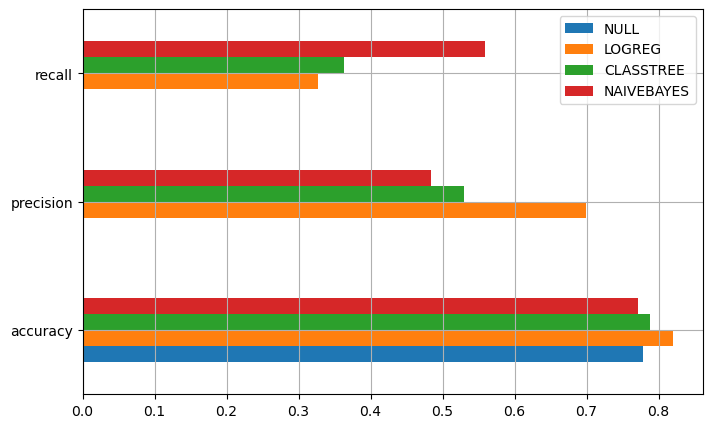

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh',ax=ax)
ax.grid();